In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



**Read datasets:**

In [3]:
fake = pd.read_csv("../input/fake-and-real-news-dataset/Fake.csv")
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
real = pd.read_csv("../input/fake-and-real-news-dataset/True.csv")
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
real = pd.read_csv("../input/fake-and-real-news-dataset/True.csv")
real.head()


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
real['Category'] = 1
fake['Category'] = 0

In [8]:
print(real.shape)
real.head()

(21417, 5)


,title,text,subject,date,Category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


**Concat both real and fake data
:**


In [9]:
dataset = pd.concat([real, fake]).reset_index(drop=True)

In [10]:
print(dataset.shape)
dataset.head()

(44898, 5)


,title,text,subject,date,Category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


find missing values

In [11]:
dataset.isnull().sum()


title       0
text        0
subject     0
date        0
Category    0
dtype: int64

no missing value in the dataset, so we we can work directly on title and text columns

**Merge Title and Text data:**

In [13]:
dataset['final_text'] = dataset['title'] + dataset['text']
dataset['final_text'].head()

0    As U.S. budget fight looms, Republicans flip t...
1    U.S. military to accept transgender recruits o...
2    Senior U.S. Republican senator: 'Let Mr. Muell...
3    FBI Russia probe helped by Australian diplomat...
4    Trump wants Postal Service to charge 'much mor...
Name: final_text, dtype: object

In [14]:
dataset[['Category','subject','final_text']].groupby(['Category','subject']).count()

final_text
Category subject                    
0        Government News        1570
         Middle-east             778
         News                   9050
         US_News                 783
         left-news              4459
         politics               6841
1        politicsNews          11272
         worldnews             10145

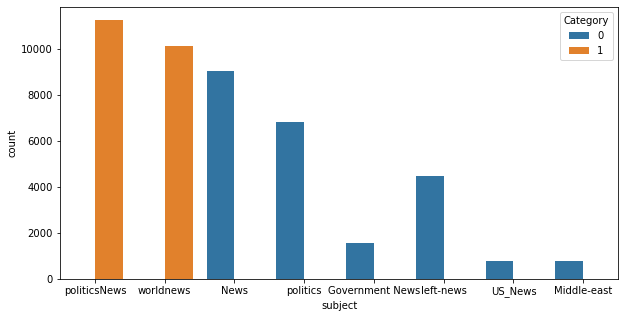

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x= "subject", hue = "Category", data=dataset)

**Preprocessing Text to get Stemmed and Lemmatized Corpus**

In [16]:
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [17]:
porter_stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [18]:
stemmed_text = []
lemmatized_text = []
final_text_result = []
for text in dataset['final_text']:
    result = re.sub('[^a-zA-Z]', ' ', text)
    result = result.lower()
    result = result.split()
    result = [r for r in result if r not in set(stopwords.words('english'))]
    stemmed_result = [porter_stemmer.stem(r) for r in result]
    stemmed_text.append(" ".join(stemmed_result))
    lemmatized_result = [lemmatizer.lemmatize(r) for r in result]
    lemmatized_text.append(" ".join(lemmatized_result))

In [19]:
print(len(stemmed_text))
print(len(lemmatized_text))

44898
44898


**Classification models using CountVectorizer and TFIDF Vectorizer:**

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [21]:
def get_prediction(vectorizer, classifier, X_train, X_test, y_train, y_test):
    pipe = Pipeline([('vector', vectorizer),
                    ('model', classifier)])
    model = pipe.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuarcy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: \n", cm)
    print("Classification Report: \n", classification_report(y_test, y_pred))

**Firstly classification by using stemmed text and both Count Vectorizer and TFIDF Vectorizer:**

In [22]:
print("******classification by using stemmed text********")
X_train, X_test, y_train, y_test = train_test_split(stemmed_text, dataset['Category'], test_size = 0.3, random_state= 0)
classifiers = [LogisticRegression(), SGDClassifier(), MultinomialNB(), BernoulliNB(), LinearSVC(),
              KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier(), GradientBoostingClassifier(), 
               RandomForestClassifier(), XGBClassifier()]
for classifier in classifiers:
    print("\n\n", classifier)
    print("***********Usng Count Vectorizer****************")
    get_prediction(CountVectorizer(), classifier, X_train, X_test, y_train, y_test)
    print("***********Usng TFIDF Vectorizer****************")
    get_prediction(TfidfVectorizer(), classifier, X_train, X_test, y_train, y_test)

******classification by using stemmed text********


 LogisticRegression()
***********Usng Count Vectorizer****************


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuarcy: 99.63
Confusion Matrix: 
 [[7043   26]
 [  24 6377]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7069
           1       1.00      1.00      1.00      6401

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470

***********Usng TFIDF Vectorizer****************
Accuarcy: 98.66
Confusion Matrix: 
 [[6963  106]
 [  74 6327]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7069
           1       0.98      0.99      0.99      6401

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



 SGDClassifier()
***********Usng Count Vectorizer****************
Accuarcy: 99.38
Confusion Matrix: 
 [[7022   47]
 [  

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuarcy: 99.52
Confusion Matrix: 
 [[7035   34]
 [  31 6370]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7069
           1       0.99      1.00      0.99      6401

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470

***********Usng TFIDF Vectorizer****************
Accuarcy: 99.47
Confusion Matrix: 
 [[7031   38]
 [  33 6368]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      7069
           1       0.99      0.99      0.99      6401

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



 KNeighborsClassifier()
***********Usng Count Vectorizer****************
Accuarcy: 78.25
Confusion Matrix: 
 [[5682 138

**Secondly classification by using CountVectorizer and TFIDF Vectorizer with lemmatized text:**

In [23]:
print("******Classification by usinglemmatized text********")
X_train, X_test, y_train, y_test = train_test_split(lemmatized_text, dataset['Category'], test_size = 0.3, random_state= 0)
classifiers = [LogisticRegression(), SGDClassifier(), MultinomialNB(), BernoulliNB(), LinearSVC(),
              KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier(), GradientBoostingClassifier(), 
               RandomForestClassifier(), XGBClassifier()]
for classifier in classifiers:
    print("\n\n", classifier)
    print("***********Usng Count Vectorizer****************")
    get_prediction(CountVectorizer(), classifier, X_train, X_test, y_train, y_test)
    print("***********Usng TFIDF Vectorizer****************")
    get_prediction(TfidfVectorizer(), classifier, X_train, X_test, y_train, y_test)

******Classification by usinglemmatized text********


 LogisticRegression()
***********Usng Count Vectorizer****************


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuarcy: 99.65
Confusion Matrix: 
 [[7046   23]
 [  24 6377]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7069
           1       1.00      1.00      1.00      6401

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470

***********Usng TFIDF Vectorizer****************
Accuarcy: 98.73
Confusion Matrix: 
 [[6966  103]
 [  68 6333]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7069
           1       0.98      0.99      0.99      6401

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



 SGDClassifier()
***********Usng Count Vectorizer****************
Accuarcy: 99.4
Confusion Matrix: 
 [[7009   60]
 [  2

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuarcy: 99.6
Confusion Matrix: 
 [[7043   26]
 [  28 6373]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7069
           1       1.00      1.00      1.00      6401

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470

***********Usng TFIDF Vectorizer****************
Accuarcy: 99.53
Confusion Matrix: 
 [[7034   35]
 [  28 6373]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7069
           1       0.99      1.00      1.00      6401

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



 KNeighborsClassifier()
***********Usng Count Vectorizer****************
Accuarcy: 77.82
Confusion Matrix: 
 [[5707 1362